In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys
import time
from scipy import stats
import matplotlib.gridspec as gridspec

if 'path' in locals(): os.chdir(path)
else: os.chdir("../../"); path = os.getcwd()
print("The path is:", path)
path_manustript = path + "/Manuscript_Results/MFI_paper_June24/"
path_Figure_4 = path_manustript + "Figure4/"
from pyMFI import MFI
from pyMFI import MFI1D
from pyMFI import run_plumed

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.size": 22, "font.family": "serif", "font.serif": ["computer modern roman"]})
plt.rcParams.update({"font.size": 22})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

times = r"$\times$"
pwr_neg = r"$^{-1}$"

#Define grid and analytical function
x=np.linspace(-2,2,201)
y=1*x**8-50*np.exp(-(x-1)**2/0.1)-93*np.exp(-(x+0.5)**2/0.05)-103*np.exp(-(x+1.5)**2/0.07)-70*np.exp(-(x)**2/0.03)+50*np.exp(-(x-0.5)**2/0.03)
y = y - np.min(y)
dy = np.gradient(y,x)


The path is: /home/ucecabj/Desktop/MFI_git


In [9]:

#Read the HILLS and Colvar data
os.chdir(path_manustript + "Figure1A")
HILLS=MFI1D.load_HILLS(hills_name="HILLS")
position = MFI1D.load_position(position_name="position")

#Compute the time-independent mean force and free energy surface
reselts = MFI1D.MFI_1D(HILLS = HILLS, position = position, bw = 0.03, log_pace = 4000, error_pace = int(len(HILLS)/500), 
                       FES_cutoff=-1, Ftot_den_cutoff=0.1, save_intermediate_fes_error_cutoff = True, use_weighted_st_dev=False)
X, Ftot_den, Ftot_den2, Ftot, ofv_num, FES, ofv, ofe, cutoff, error_evol, fes_error_cutoff_evol = reselts

aad_evol = []
for i in range(len(fes_error_cutoff_evol[0])):
    #Find FES and AAD
    FES = fes_error_cutoff_evol[0,i] 
    AD = abs(FES - y) * fes_error_cutoff_evol[3,i]
    AAD = np.sum(AD) / np.count_nonzero(fes_error_cutoff_evol[3,i])
    aad_evol.append(AAD)

[time_history_1, ofe_history_1, aad_history_1 ,volume_history_1] = [error_evol[3], error_evol[1], aad_evol ,error_evol[2]]


20.0 %   OFE = 2.2453
40.0 %   OFE = 1.6781
60.0 %   OFE = 1.4145
80.0 %   OFE = 1.371
100.0 %   OFE = 4.7094


In [8]:
# Analyse alanine dipeptide simulation and get error progressions

os.chdir(path_manustript + "Figure1B")
FES_ref = MFI.load_pkl("AD_ref_fes")

#Read the HILLS and Colvar data
os.chdir(path_manustript + "Figure1B")
HILLS=MFI.load_HILLS_2D(hills_name="HILLS40")
[position_x, position_y] = MFI.load_position_2D(position_name="position40")

#Compute the time-independent mean force and free energy surface
NH=10000
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = [0.1,0.1], kT = 2.49, error_pace=int(NH/2000), WellTempered=1, nhills=NH, periodic = [1,1], ref_fes=FES_ref, use_weighted_st_dev=False)
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, aad_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results

# rename results for plotting
[time_history_2, ofe_history_2, aad_history_2 ,volume_history_2] = [time_history, ofe_history, aad_history ,volume_history]


|**************************************************| 100% | Average Mean Force Error: 4.963

#### Plot Figure 4

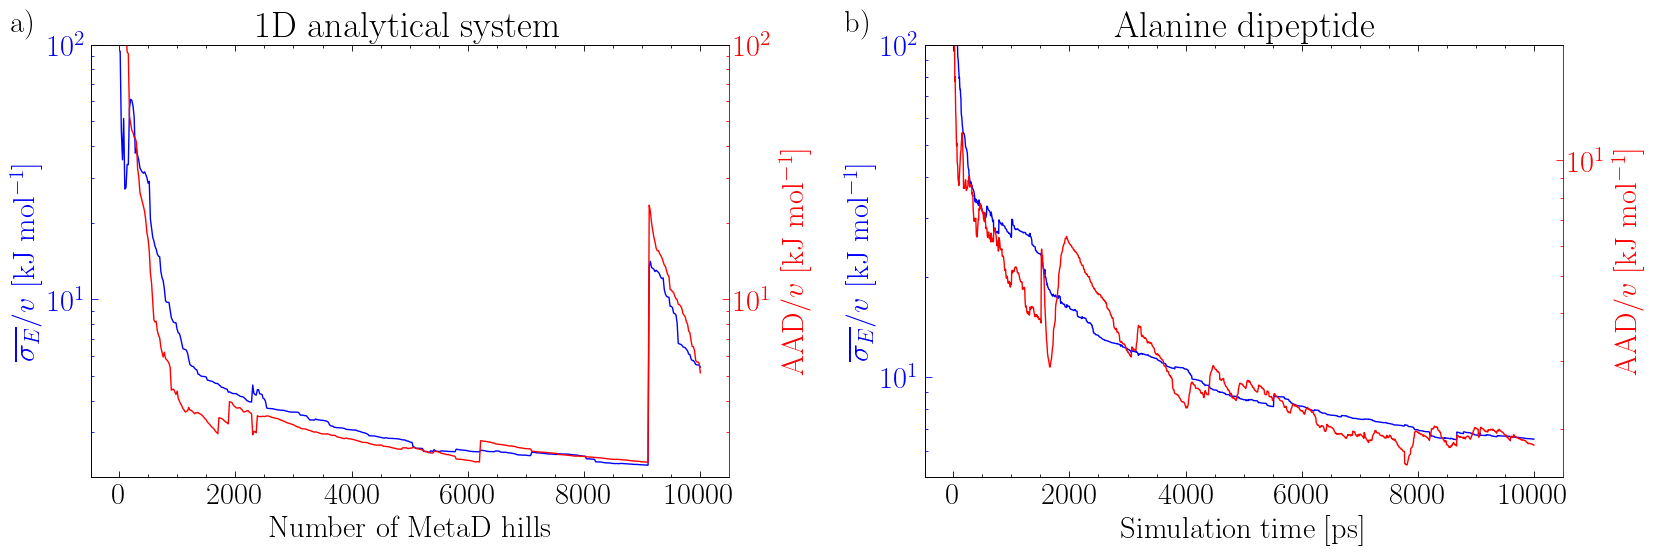

In [11]:
# [time_history_1, ofe_history_1, aad_history_1 ,volume_history_1] = MFI.load_pkl(path_Figure_4 + "data_figure_4_1A.pkl")
# [time_history_2, ofe_history_2, aad_history_2 ,volume_history_2] = MFI.load_pkl(path_Figure_4 + "data_figure_4_1B.pkl")

fig = plt.figure(figsize=(17,6))
gs = gridspec.GridSpec(3, 100, height_ratios=[1, 1, 1])

ax1 = fig.add_subplot(1,2,1)
ax2 = ax1.twinx()

ax4 = fig.add_subplot(1,2,2) 
ax5 = ax4.twinx() 

##############################################################################################################


ax1.plot( time_history_1, np.asarray(ofe_history_1) / np.asarray(volume_history_1) ,color='blue',linewidth=1)
ax2.plot( time_history_1, np.asarray(aad_history_1) / np.asarray(volume_history_1) ,color='red',linewidth=1)
ax1.set_xlabel("Number of MetaD hills"); ax1.set_ylabel("$\overline{\sigma_E}/v$ [kJ mol$^{-1}$]", c="blue"); ax2.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]", c="red")#ax1.set_title("error/volume vs time"); 
ax1.set_ylim(0,30)
ax2.set_ylim(0,30)
# ax1.set_xlim(-750, 10200)
ax1.tick_params(axis='y', which='both', colors='blue'); ax1.spines['right'].set_color('blue')      
ax2.tick_params(axis='y', which='both', colors='red'); ax2.spines['right'].set_color('red')    
ax1.set_title("1D analytical system")
ax1.set_yscale("log")
ax1.set_ylim(2,100)
ax2.set_yscale("log")
ax2.set_ylim(2,100)
 

##############################################################################################################

ax4.plot( time_history_2, np.asarray(ofe_history_2) / np.asarray(volume_history_2) ,color='blue',linewidth=1,label="Aofe")
ax5.plot( time_history_2, np.asarray(aad_history_2) / np.asarray(volume_history_2) ,color='red',linewidth=1,label="AAD")
ax4.set_xlabel("Simulation time [ps]"); ax4.set_ylabel("$\overline{\sigma_E}/v$ [kJ mol$^{-1}$]", c="blue"); ax5.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]", c="red")
ax4.set_ylim(0,50)
ax5.set_ylim(0,10)
# ax4.set_xlim(-750, 10200)
ax4.tick_params(axis='y', which='both', colors='blue'); ax4.spines['right'].set_color('blue')        
ax5.tick_params(axis='y', which='both', colors='red'); ax5.spines['right'].set_color('red')      
ax4.set_title("Alanine dipeptide")
ax4.set_yscale("log")
ax4.set_ylim(5,100)
ax5.set_yscale("log")
ax5.set_ylim(1.5,20)

h = [0.91]
w = [0.02, 0.51]
fig.text(x=w[0], y=h[0], s="a)")
fig.text(x=w[1], y=h[0], s="b)")


plt.tight_layout()
# plt.savefig(path_Figure_4 + 'Figure4_MFI.png', dpi=600, bbox_inches='tight')
plt.show()